# Calculate the Cluster Cross-Correlation

...as a matrix of r² values

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os.path as op

from typing import Iterable, List

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML, display 

# from tqdm.notebook import tqdm
import ipywidgets as ipyw
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from jupy_tools import plt_style, cpa
from jupy_tools import utils as u
from jupy_tools.utils import info
u.timestamp()

Timestamp: 03-Jun-2022 12:11:34


## Load Data Set

In [2]:
ds_refs = u.read_tsv("../output/ds_refs_sim_to_clusters.tsv")

read_tsv                           : [    3547 / 601 ] 


In [3]:
clusters = cpa.get_func_cluster_names()
clusters

['AKT_PI3K_MTOR',
 'Aurora',
 'BET',
 'DNA_Synth',
 'HDAC',
 'HSP90',
 'LCH',
 'Protein_Synth',
 'Tubulin',
 'Uncoupler']

In [4]:
corr = {"Cluster1": [], "Cluster2": [], "Corr": []}
idx_last = len(clusters) - 1
for idx, cl2 in enumerate(clusters[:idx_last]):
    for cl1 in clusters[idx+1:]:
        c = ds_refs[f"Cluster_{cl1}"].corr(ds_refs[f"Cluster_{cl2}"])
        # data['column1'].corr(data['column2'])
        corr["Cluster1"].append(cl1)
        corr["Cluster2"].append(cl2)
        corr["Corr"].append(c)
df_corr = pd.DataFrame(corr)
df_corr

,Cluster1,Cluster2,Corr
0,Aurora,AKT_PI3K_MTOR,-0.017878
1,BET,AKT_PI3K_MTOR,-0.720237
2,DNA_Synth,AKT_PI3K_MTOR,0.776627
3,HDAC,AKT_PI3K_MTOR,-0.720872
4,HSP90,AKT_PI3K_MTOR,0.005578
5,LCH,AKT_PI3K_MTOR,-0.694320
6,Protein_Synth,AKT_PI3K_MTOR,-0.653211
7,Tubulin,AKT_PI3K_MTOR,-0.762723
8,Uncoupler,AKT_PI3K_MTOR,-0.440603
9,BET,Aurora,-0.385005


Text(0.5, 1.0, 'Cluster Cross-Correlation')

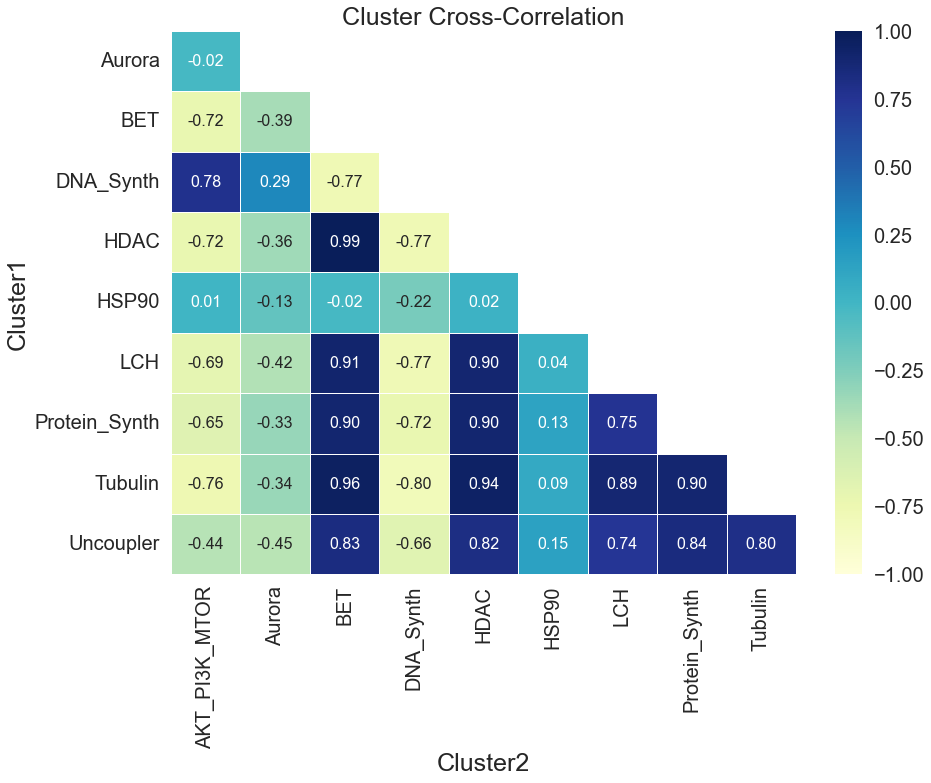

In [5]:
tmp = df_corr.copy()
tmp = tmp.pivot("Cluster1", "Cluster2", values="Corr")
f, ax = plt.subplots(figsize=(14, 10))
hm = sns.heatmap(tmp, annot=True, fmt=".2f", linewidths=.5, annot_kws={"size": 16}, cmap="YlGnBu", vmin=-1.0, vmax=1.0, ax=ax);
# hm.invert_yaxis()
hm.set_title("Cluster Cross-Correlation")
fig = hm.get_figure()
plt.savefig("plots/clusters_crosscorr.png", bbox_inches='tight')
plt.savefig("plots/clusters_crosscorr.svg", bbox_inches='tight')

In [20]:
tmp.head()

Cluster2,Aurora,BET,DNA_Synth,HDAC,HSP90,LCH,Protein_Synth,Tubulin,Uncoupler
Cluster1,,,,,,,,,
AKT_PI3K_MTOR,-0.017878,-0.720237,0.776627,-0.720872,0.005578,-0.694320,-0.653211,-0.762723,-0.440603
Aurora,NaN,-0.385005,0.289068,-0.360808,-0.133973,-0.423960,-0.329534,-0.338228,-0.446170
BET,NaN,NaN,-0.767689,0.987671,-0.018166,0.912487,0.903885,0.957595,0.834618
DNA_Synth,NaN,NaN,NaN,-0.771554,-0.220968,-0.774888,-0.720169,-0.798950,-0.658611
HDAC,NaN,NaN,NaN,NaN,0.023550,0.897205,0.904775,0.944322,0.820126
